In [1]:
from vqa_logger import logger 
import IPython


In [8]:
from classes.vqa_model_predictor import VqaModelPredictor, DefaultVqaModelPredictor
from common.DAL import get_models_data_frame, get_model
from evaluate.VqaMedEvaluatorBase import VqaMedEvaluatorBase
from common.functions import get_highlited_function_code
df_models = get_models_data_frame()
df_show = df_models.sort_values(by=['wbss', 'bleu'], ascending=False).head()
df_show



,wbss,bleu,model_id,models,accuracy,recall_val,val_accuracy,precsision,class_strategy,id,...,history_location,activation,f1_score,image_base_net,notes,f1_score_val,loss,recall,val_loss,model_scores
125,0.362842,0.159401,126,"Model(id=126,\n\tmodel_location=C:\Users\Publi...",0.199150,NaN,0.060,0.000048,None,126,...,C:\Users\Public\Documents\Data\2018\vqa_models...,relu,NaN,vgg19,post_concat_dense_units: 32;\nOptimizer: SGD\n...,NaN,1.106668e+06,NaN,0.082502,"[ModelScore(model_id=126, bleu=0.1594013807568..."
120,0.362842,0.159401,121,"Model(id=121,\n\tmodel_location=C:\Users\Publi...",0.200813,NaN,0.060,0.000000,None,121,...,C:\Users\Public\Documents\Data\2018\vqa_models...,relu,NaN,vgg19,post_concat_dense_units: 16;\nOptimizer: SGD\n...,NaN,8.083675e+05,NaN,0.082502,"[ModelScore(model_id=121, bleu=0.1594013807568..."
69,0.351124,0.152541,70,"Model(id=70,\n\tmodel_location=C:\Users\Public...",0.075189,NaN,0.052,0.000000,None,70,...,C:\Users\Public\Documents\Data\2018\vqa_models...,relu,NaN,vgg19,post_concat_dense_units: 32;\nOptimizer: Adam\...,NaN,3.962644e-03,NaN,0.000829,"[ModelScore(model_id=70, bleu=0.15254120630928..."
124,0.349352,0.152604,125,"Model(id=125,\n\tmodel_location=C:\Users\Publi...",0.081101,NaN,0.050,0.000000,None,125,...,C:\Users\Public\Documents\Data\2018\vqa_models...,relu,NaN,vgg19,post_concat_dense_units: 16;\nOptimizer: Adam\...,NaN,2.313582e+06,NaN,3909.898907,"[ModelScore(model_id=125, bleu=0.1526041398521..."
33,0.347442,0.151107,34,"Model(id=34,\n\tmodel_location=C:\Users\Public...",0.041936,NaN,0.034,0.000000,None,34,...,C:\Users\Public\Documents\Data\2018\vqa_models...,relu,NaN,vgg19,model_location = 'C:\Users\Public\Documents\Da...,NaN,2.690043e-03,NaN,0.000834,"[ModelScore(model_id=34, bleu=0.15110741206227..."


In [13]:
known_good_model = 85
model_id = known_good_model #df_show.id.iloc[0]
model_id = int(model_id)
mp = DefaultVqaModelPredictor(model_id)
mp

[2018-11-23 10:42:17,973][DEBUG] Getting model #85 (post_concat_dense_units: 16;
Optimizer: Adam
loss: cosine_proximity
activation: tanh
epochs: 1
batch_size: 75

model_location = 'C:\Users\Public\Documents\Data\2018\vqa_models\20180913_0400_53\vqa_model_.h5')
Loading Model: 0:00:02.784701
[2018-11-23 10:42:20,770][DEBUG] Loading test data from C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.h5
Loading Test & validation Data: 0:00:06.973287


In [14]:
mp.df_validation.head(2)

,image_name,question,answer,group,path,tumor,hematoma,brain,abdomen,neck,liver,imaging_device,answer_embedding,question_embedding
0,ATM-02-80-g002.jpg,what does thorax CT show?,regression filtrations,validation,C:\Users\Public\Documents\Data\2018\VQAMed2018...,False,False,False,False,False,False,ct,"[[1.5284286737442017, 2.2347638607025146, 1.33...","[[-1.4854373931884766, 2.8500685691833496, 0.3..."
1,AJNS-8-48-g001.jpg,where does CT show hematoma?,left parietal area,validation,C:\Users\Public\Documents\Data\2018\VQAMed2018...,False,True,False,False,False,False,ct,"[[0.7187732458114624, -0.48079681396484375, -4...","[[0.6868043541908264, 1.1098476648330688, -3.6..."


In [15]:
code = get_highlited_function_code(mp.predict,remove_comments=False)
IPython.display.display(code)

In [16]:
df_data = mp.df_validation
df_predictions = mp.predict(mp.df_validation)
df_predictions.head()

Raw model prediction: 0:01:08.352712


,answer,image_name,question,prediction,probabilities,path
0,regression filtrations,ATM-02-80-g002.jpg,what does thorax CT show?,ct mri left scan right abdomen contrast,"[(0.740), (0.435), (0.609), (0.456), (0.530), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...
1,left parietal area,AJNS-8-48-g001.jpg,where does CT show hematoma?,ct mri left mass scan right abdomen,"[(0.588), (0.419), (0.487), (0.436), (0.395), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...
2,a paraesophageal retrotracheal mass,1477-7819-2-41-1.jpg,what does CT show?,ct left mass scan right tumor abdomen,"[(0.768), (0.715), (0.532), (0.587), (0.582), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...
3,non mass-like enhancement,iranjradiol-10-99-g001.jpg,what does MRI demonstrate?,ct bra mri left mass right tumor,"[(0.393), (0.267), (0.379), (0.378), (0.282), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...
4,mimal basilar ateleCTasis,Tanaffos-10-072-g001.jpg,what does CT chest show?,ct left mass scan right tumor abdomen,"[(0.831), (0.762), (0.695), (0.640), (0.762), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...


In [8]:
df_predictions.describe()

,answer,image_name,question,prediction,probabilities,path
count,500,500,500,500,500,500
unique,454,324,353,20,154,324
top,no,kjim-18-1-45-8f2.jpg,what does CT show?,ct abd acl aga age air aml arm avm avn bdg beg...,"[(0.000), (0.000), (0.000), (0.000), (0.000), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...
freq,18,4,51,473,270,4


In [17]:
idx = 42
image_names = df_predictions.image_name.values
image_name = image_names[idx]

df_image = df_predictions[df_predictions.image_name == image_name]
# print(f'Result: {set(df_image.prediction)}')

image_path = df_image.path.values[0]
df_image

,answer,image_name,question,prediction,probabilities,path
42,bronchogenic cyst,1757-1626-0002-0000008070-003.jpg,what does chest CT show?,ct left mass scan right tumor abdomen,"[(0.943), (0.897), (0.782), (0.777), (0.849), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...
389,yes,1757-1626-0002-0000008070-003.jpg,Is re fluid right hemithorax?,ct left mass scan right tumor abdomen,"[(0.943), (0.897), (0.782), (0.777), (0.849), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...


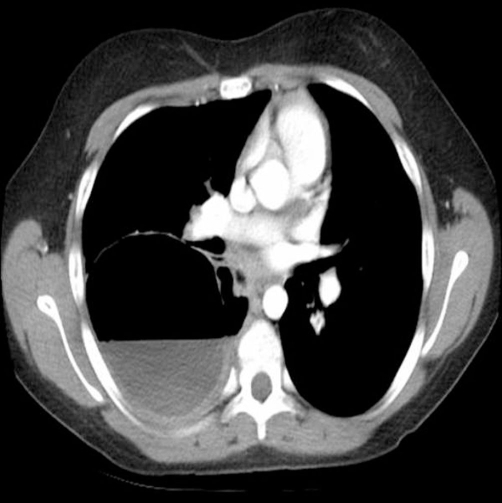

In [19]:
from IPython.display import Image
Image(filename = image_path, width=400, height=400)

In [20]:
df_image = df_data[df_data.image_name == image_name].copy().reset_index()
image_prediction = mp.predict(df_image)
image_prediction

Raw model prediction: 0:00:04.196156


,answer,image_name,question,prediction,probabilities,path
0,bronchogenic cyst,1757-1626-0002-0000008070-003.jpg,what does chest CT show?,ct left mass scan right tumor abdomen,"[(0.943), (0.897), (0.782), (0.777), (0.849), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...
1,yes,1757-1626-0002-0000008070-003.jpg,Is re fluid right hemithorax?,ct left mass scan right tumor abdomen,"[(0.943), (0.897), (0.782), (0.777), (0.849), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...


## Evaluating the Model

In [21]:
validation_prediction = df_predictions
predictions = validation_prediction.prediction.values
ground_truth = validation_prediction.answer.values
results = VqaMedEvaluatorBase.get_all_evaluation(predictions=predictions, ground_truth=ground_truth)
print(f'Got results of\n{results}')

Got results of
{'bleu': 0.2132458846711877, 'wbss': 0.16975551660382787}


In [22]:
validation_prediction.head(2)

,answer,image_name,question,prediction,probabilities,path
0,regression filtrations,ATM-02-80-g002.jpg,what does thorax CT show?,ct mri left scan right abdomen contrast,"[(0.740), (0.435), (0.609), (0.456), (0.530), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...
1,left parietal area,AJNS-8-48-g001.jpg,where does CT show hematoma?,ct mri left mass scan right abdomen,"[(0.588), (0.419), (0.487), (0.436), (0.395), ...",C:\Users\Public\Documents\Data\2018\VQAMed2018...
